# Natural Language Processing

Poiché il testo umano non segue delle regole precise (refusi, tempi coniugati male, convenzioni non scritte, sarcasmo, ecc.), ovvero non è testo strutturato, non è facile capire come poterlo far comprendere a una macchina.

## Preprocessing
Come prima cosa va fatto del pre-processing che consiste nell’operare delle trasformazioni ai dati in input per poterli fornire a dei modelli.

1. **Tokenization**. È la pratica di segmentare il testo in token più piccoli. Può trattarsi di word tokenization se si splitta in parole o sentences tokenization se un testo lungo viene suddiviso prima in frasi.
2. **POS**. In secondo luogo occorre fare quello che prende il nome di Part Of Sentence tagging. Le parole hanno un proprio ruolo grammaticale (nome, verbo, aggettivo) all’interno di una frase, addirittura la stessa parola in contesti diversi può avere POS differenti. Il POS tagging è la procedura che assegna un POS ad ogni parola. Questo può essere fatto o meno.
3. **Filtrare la sequenza di parole**. Occorre filtrare la sequenza da caratteri spuri (tag HTML o altro).
4. **Casefolding**. Poiché le parole possono essere scritte tutte in maiuscolo, tutte in minuscolo o con la prima lettera in maiuscolo pur avendo lo stesso significato, quello che si fa tipicamente è convertire tutto nello stesso formato, in questo modo si è in grado di uniformare e sintetizzare parole uguali ma in formati originariamente diversi.
5. **Rimozione di stopword**. Le stopword sono quelle parole che non hanno contenuto informativo (come articoli, pronomi, ecc) ma che sono inserite nel testo poiché facenti parti del linguaggio naturale. Vengono tipicamente inserite in liste utilizzate per ripulire il testo.
6. **Lemmatizzazione** Le parole vengono tipicamente modificate a seconda del contesto per adattarle alla frase (declinazioni, coniugazioni, ecc.). Ad esempio, il verbo “trovare” può essere trovato come “trovano”, “trovasti”, “trovò”, ecc. sebbene indichino tutti la stessa cosa. La lemmatizzazione si occupa proprio di normalizzare queste parole e riportarle alla loro forma base. Non è facile farlo, specie perché dipende dalla lingua in uso.
7. **Stemming**. Algoritmo decisamente più semplice della lemmatizzazione, nato però con lo stesso scopo. La differenza è che questo ricava da ogni parola la sua radice morfologica e unisce parole con stessa radice. Questo può essere anche più impreciso perché potrebbe unire anche verbi e aggettivi nello stesso token ad esempio. Sebbene meno preciso è più semplice da implementare.

## Full Text Search (FTS)
Il primo tipo di algoritmi in merito al NLP sono detti **information retrieval**. Questi sistemi si occupano,
-	data una **query**, cioè una stringa di parole chiave rappresentati l’informazione richiesta, 
-	di fornire un **oggetto** che condensa queste informazioni, quindi tipicamente fornire un elenco di documenti (che chiaramente presentano testo non strutturato) che trattano di quell’informazione, ovviamente dal documento più rilevante a quello meno. 
Se la query contiene più termini, inoltre, va specificato se devono comparire tutti o solo alcuni, se vanno trovati nello stesso ordine con cui sono elencati nella query, se possono anche essere restituiti testi con parole simili, ecc. 
Questi sistemi si misurano su due parametri che riassumono un po’ i concetti di qualità e quantità spesso in contrasto
1.	**Precision**. Consiste nella precisione con cui funziona l’algoritmo. È il rapporto fra documenti pertinenti trovati e i documenti forniti (qualità).
2.	**Recall**. Consiste nel rapporto fra quantità di documenti reputati pertinenti al punto da essere forniti in output, e l’insieme di tutti i documenti pertinenti nella collezione.

Esistono diversi **modelli** per questa disciplina che si classificano in base alle teorie matematiche alla base o alla modalità con cui si ha interdipendenza dei termini.
-	**Modello Booleano Standard**. Modello più semplice in assoluto. I documenti vengono suddivisi in rilevanti e non rilevanti e vengono restituiti senza un ordine specifico. I termini della query possono essere concatenati con operatori logici
    -	A AND B restituisce l’insieme dei documenti che sono rilevanti sia per il termine A che per il termine B
    - A OR B restituisce l’insieme dei documenti che sono rilevanti o per A o per B
    
    È semplice da usare e implementare ma non restituisce documenti con un ordine preciso e risulta troppo semplice, non coglie tutte le sfaccettature del linguaggio.

- **Modello Vettoriale**. Questo modello si basa sulla teoria dei vettori. I documenti vengono rappresentati come vettori di termini e la query viene rappresentata come un vettore di termini. La similarità fra i vettori viene calcolata con la coseno similarità. I documenti vengono restituiti in ordine di similarità. Questo modello è più complesso da implementare ma è più preciso e flessibile. 

## Estrazione di semantica testuale
Fino ad ora abbiamo visto tecniche che interpretano la sintassi e la struttura del testo per ricavarne gli elementi di base (ad esempio gli argomenti trattati). Oltre a questo, una sfida più complessa è capire il significato esatto del testo. Tuttavia, questo è un risultato molto complicato da ottenere per un calcolatore visto quanto detto prima.
Per poter comprendere il significato di un testo dobbiamo 
-	Conoscere tutte le parole al suo interno (capire i significati possibili per la parola X e conoscere parole simili)
-	Capire come queste siano in relazione fra loro 

Gli algoritmi di estrazione semantica usano una **base testuale esterna** del linguaggio per poter interpretare correttamente un testo. **WordNet** è il database lessicale in inglese più grande in circolazione
-	 include più di 150k termini divisi in 4 POS (nomi, verbi, aggettivi, avverbi)
-	ogni parola è organizzata in **synset** (synonimous set) ovvero un set di sinonimi per quella parola. Ogni synset ha una breve descrizione del significato di quei sinonimi. Una stessa parola può far parte di più synset
-	Tra synset e termini definiti in essi sono esposte anche le **relazioni semantiche e lessicali**

Una **relazione semantica** rappresenta che relazione vi è fra due synset o due termini. Ad esempio possiamo avere 
-	**Iponimia**. Essere un tipo specifico di. Cane is-a animale.
-	**Meronimia**. Essere parte/membro/sostanza di.
-	**Implicazione**. Un’azione ne comporta un’altra. 
-	**Antonimia**. Essere opposto di.

Di seguito si riporta un esempio di struttura di word net
<img src="imgs/wordnet.png" alt="wordnet" width=500>

## Word Sense Disambiguation (WSD)
La Word Sense Disambiguation (WSD) è la procedura che associa ad ogni parola il suo significato a seconda del contesto. Cioè, disambigua le parole (ad esempio a “spina” è attribuito, a seconda del contesto, ad un aculeo di animale o a una presa di corrente). Per comprendere il contesto di una parola, tipicamente si cerca di comprendere le parole vicino a cui è inserita. Ad esempio, l’algoritmo di Lesk disambigua una parola controllando quante delle parole vicine nella frase si ripresentano nella sua definizione. Tornando al concetto di spina, ad esempio, avremo
-	**Definizione**. Una spina elettrica è un connettore che può essere inserito in una presa di corrente complementare.
-	**Frase**. La spina elettrica è inserita nella presa di corrente (in elettronica), Elemento indurito, acuminato, e pungente (botanica)

È evidente che si sta parlando di spina elettrica.


## Named Entity Recognition

Le **named entities** sono specifiche entità a cui ci si può riferire per nome in un testo (ad esempio una persona come “Il presidente Obama” o un luogo “Germania” o ancora un’organizzazione “ONU”). Sono considerate tali anche date e numeri.
La **named entity recognition (NER)** consiste nell’individuare e classificare per tipo le named entities, ad esempio in “persone”, “luoghi”, “organizzazioni”. In Python esistono librerie come NLTK (NL ToolKit) e SpaCy che hanno implementato algoritmi di NER.


## Come rappresentare il testo

Nell’analisi di un testo serve spesso rappresentare il contenuto generale in forma sintetica o comunque schematizzata (strutturata). Poiché le parole, una volta assegnato il rispettivo POS, non richiedono di essere disposte nell’ordine originale per comprendere il contenuto del testo, possono essere strutturate in svariati modi.

-	**Bag of Word (BoW)**. Questa rappresentazione inserisce in una tabella (parola-occorrenze) tutte le parole distinte del testo con le rispettive occorrenze. A questo servono processi come lo stemming o lemmatizzazione in fase di pre-processing: sintetizzando e raggruppando parole è possibile ridurre la dimensione di questa tabella.

<img src="imgs/bow.png" alt="bow" width=150>

 
-	**N-gram**. Sono una tecnica per arricchire ulteriormente il BOW. Consistono nella concatenazione di n parole ritenute concettualmente collegate fra loro. L’indice “n” rappresenta il numero di parole che sono raggruppati. Sono inclusi anche molti n-gram non significativi (ad esempio in figura le parole rosse).

<img src="imgs/ngram.png" alt="ngram" width=150> 
 
-	**Rappresentazione vettoriale**. Questo bow appena trovato può essere inserito in un vettore. In particolare, si consideri un dizionario D di termini distinti. L’i-esimo elemento del vettore corrisponde alle occorrenze dell’i-esimo termine del dizionario D. ovviamente il vettore sarà composto da |D| elementi.

<img src="imgs/vect.png" alt="vect" width=400>

-	**Vector Space Model (VSM)**. Racchiude in sé tutte le occorrenze in N documenti distinti delle $|D|$ parole del dizionario comune. 
L’insieme dei documenti può essere rappresentata come una matrice termini-documenti $D \times N$ dove l’elemento $(i,j)$ rappresenta l’occorrenza della parola $i-$ esima nel documento $j-$ esimo.

<img src="imgs/vsm.png" alt="wordnet" width=400>
 


## Term weighting
Ogni parola ha un’importanza (o peso) all’interno di un documento. Cioè, vi saranno quelle parole più significative di altre per comprendere il significato del contenuto del testo. Le parole di “stopword” sono considerate pressoché a peso 0 all’interno del documento e pertanto sono rimosse in fase di pre-processing. Una prima metrica di importanza di una parola è il numero di occorrenze che essa ha avuto nel testo.
Esistono però metriche più accurate basate su **schemi di term weighting**. In particolare, considerando un vector space model (VSM) si possono usare le seguenti modalità 
-	**Tf** (term frequency). È un fattore “locale” che pesa la rilevanza di ciascun termine sul singolo documento, è il numero di apparizioni del termine all’interno del documento.
-	**Idf** (inverse document frequency). È un fattore “globale” che pesa l’importanza di ciascun termine nell’intera collezione. È più alto per termini che compaiono in meno documenti, in quanto più utili a distinguere questi documenti dagli altri. 
-	**Tf-idf**. Dato un termine t e un documento d è il prodotto dei logaritmi di tf e idf
$$
tf.idf(t,d) = \underbrace{\log (f(t,d))}_{tf} \cdot \underbrace{\log \left( \frac{|D|}{|d \in D : t \in d|} \right)}_{itf}
$$

## Normalizzazione dei vettori
I documenti non hanno tutti la stessa lunghezza, pertanto, a lunghezza maggiore corrispondono anche pesi più elevati (ovviamente più lungo è il documento e maggiori saranno le occorrenze di tutte le parole, questo però non garantisce che l’argomento riconosciuto come importante sia più rilevante in quel testo che in un altro più breve). **Per garantire pari peso a documenti di lunghezza diversa si normalizzano i vettori** ottenuti in seguito al term weighting.

$$
w(t,d)_{\text{norm}} = \frac{w(t,d)}{\sqrt{\sum_{\tau \in D} w(\tau, d)^2}}
$$


## Similarità coseno
Rappresentando i documenti sottoforma di vettori nel medesimo spazio, è possibile misurarne la similarità con varie metriche. Una delle varie metriche è quella della **similarità coseno** pari al coseno dell’angolo fra vettori. 

$$
\cos(\mathbf{a}, \mathbf{b}) = \frac{\mathbf{a} \cdot \mathbf{b}}{|\mathbf{a}| \cdot |\mathbf{b}|} = \frac{\sum_{i=1}^n a_i \cdot b_i}{\sqrt{\sum_{i=1}^n a_i^2} \cdot \sqrt{\sum_{i=1}^n b_i^2}}
$$


## Vector Space Model vs Modello Booleano
A differenza del modello booleano, con VSM l’output di una query è una lista con ranking effettivo dei documenti (sono ordinati dal più rilevante al meno). Inoltre, la misura dell’output non è limitata come nel booleano dove poteva essere solamente (sì o “no”, “presente” o “non presente”), nel caso del VSM, infatti, ogni parola ha un peso calcolato con le metriche td-dif. Attraverso questo peso è possibile avere degli iperparametri come **soglia di similarità**, si prendono documenti aventi pesi simili per termini logicamente simili. Non è però possibile usare espressioni booleane in VSM, tuttavia esistono modelli che combinano VSM e logica booleana. Lo si fa in questo modo:
-	Il modello prima ottiene i documenti che soddisfano l’espressione booleana
-	Il risultato viene poi sottoposto al modello VSM che ordina i documenti calcolandone il rank tramite pesi.


## Ricerca di un termine e indicizzazione
La ricerca di documenti rilevanti sulla base di una query è di fatto la ricerca di quei documenti in cui sono presenti delle occorrenze di termini dati nella query. Tipicamente quello che si può fare è una ricerca sequenziale su tutti i documenti, verificandone la rilevanza di ciascuno alla query.
Questo però comporta un notevole dispendio di tempo per documenti lunghi poiché vanno confrontate tutte le parole e dunque la complessità diventa $O(N)$ (con $N$ = # documenti su cui cercare).
<img src="imgs/textmap.png" alt="Struttura dati documento-termini" width=600>
Una cosa più intelligente da fare potrebbe essere quella di applicare indicizzazione. Una tipica struttura usata è l’inverted index che prevede di avere una mappa in cui la chiave è il termine mentre il valore è la lista di documenti in cui compare.  L’accesso è praticamente immediato ($O(1)$)
<img src="imgs/termmap.png" alt="Struttura dati termine-documenti" width=600>

## Customer satisfaction da dati testuali
La customer satisfaction è la pratica che consente di valutare l’apprezzamento per un prodotto da parte degli utenti in base alle loro recensioni. Qualora le recensioni siano numeriche (valutazioni da 1 a 5 stelle) la valutazione è semplice, se però vi è del testo le cose si complicano.
-	La prima cosa che viene in mente di fare è estrapolare le parole chiave di una recensione che indicano soddisfazione o meno, ad esempio “consigliato” o “capolavoro” per recensioni positive o “orribile”, “mediocre” per negative. Una possibilità è dunque quella di memorizzare in una lista queste parole e controllarne le occorrenze nelle recensioni. 
In particolare, l’idea è di avere una **lista di termini** usati per esprimere pareri postivi, e una per quelli negativi. Estraendo le singole parole dal testo e facendo il rapporto fra positive e negative possiamo arrivare al grado di soddisfazione dell’utente.
-	Un altro approccio consiste nell’**analizzare automaticamente recensioni etichettate** per estrarne un modello di conoscenza. Poiché ricercare parole chiave richiede tempo, la compilazione di liste è difficile e mai completa (inoltre varia da lingua a lingua) e per di più in base al contesto una stessa parola chiave può avere significati completamente diversi (“piccola” per una fotocamera è positiva, per una stanza d’albergo no).
L’idea, pertanto, è quella di estrarre in automatico conoscenza sulle parole usate nel contesto specifico usando recensioni pre-etichettate come positive o negative.
In questo viene in aiuto il **machine learning** e la **classificazione**. Il machine learning fornisce un enorme aiuto per effettuare predizioni sui dati. Occorre classificare i dati in gruppi secondo dei criteri specifici. La cosa non è facile e normalmente si usano algoritmi di apprendimento supervisionato
    - Si fornisce all’algoritmo un dataset già pre-etichettato in classi per fargli estrarre un modello di conoscenza 
    - Il modello è usato come classificatore per predire le classi di appartenenza a dati simili
    
    Esistono tantissimi algoritmi di apprendimento supervisionato che generano modelli di conoscenza fra cui
    - **Modelli probabilistici**. Calcola la classe di appartenenza più probabile a seconda delle caratteristiche dell’oggetto.
    - **K-nearest neighbor**. Verifica quale sia la classe più ricorrente tra i k oggetti di training con caratteristiche simili a quelle dell’oggetto preso in considerazione.
    - **Alberi decisionali, support vector machines, reti neurali**, …

    Per definire le caratteristiche (features) degli oggetti si può usare una rappresentazione strutturata. Una soluzione può essere quella di rappresentare ciascun oggetto come un vettore in uno spazio multidimensionale. Ogni dimensione corrisponde a una feature degli oggetti. In questo modo è facile calcolare la similarità, ad esempio usando il metodo **similarità coseno**.

In conclusione 
-	Con il ML è possibile estrarre un classificatore da dataset etichettati con recensioni “positive” o “negative”.
-	Il modello così ottenuto potrà essere usato per classificare nuove recensioni in quello stesso ambito (a seconda del contesto ricordiamo che stessi termini cambiano significato.
-	Per trattare i testi è necessario rappresentarli come vettori. È possibile usare il Vector Space Model in cui appunto ogni termine distinto rappresenta una feature (e dunque una dimensione su cui è definito il vettore). Per confrontare due testi si può usare la similarità coseno.


# Esercitazione

- Con _Natural Language Processing_ (NLP) ci si riferisce all'insieme di tecniche per il processamento di **testo in linguaggio naturale** (inglese, italiano, ...)
- Obiettivo del NLP è estrarre **informazioni di alto livello** dal testo o convertirlo in una **forma strutturata** (es. vettori e matrici) trattabile da altri algoritmi

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## NLTK

- _NLTK_ (_Natural Language Toolkit_) è una delle principali librerie Python per il trattamento di testi in linguaggio naturale
- Fornisce diversi algoritmi, spesso usati come componenti per pre-processare documenti di testo nell'ambito di analisi di dati
- NLTK è già inclusa in Colab e Anaconda, in altri casi può essere installata con pip

In [2]:
%pip install nltk
import nltk

                                              0.0/1.5 MB ? eta -:--:--
     ---------                                0.4/1.5 MB 7.6 MB/s eta 0:00:01
     ------------------------                 0.9/1.5 MB 9.7 MB/s eta 0:00:01
     ---------------------------------------  1.5/1.5 MB 10.5 MB/s eta 0:00:01
     ---------------------------------------- 1.5/1.5 MB 8.0 MB/s eta 0:00:00
                                              0.0/268.0 kB ? eta -:--:--
     -------------------------------------- 268.0/268.0 kB 8.3 MB/s eta 0:00:00
                                              0.0/77.1 kB ? eta -:--:--
     ---------------------------------------- 77.1/77.1 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## Segmentazione

- La _segmentazione_ (_tokenization_) consiste nella scomposizione di un testo in una **sequenza di elementi** (_token_)
- Comunemente la segmentazione è usata per estrarre le **singole parole** da un testo, includendo opzionalmente numeri, segni di punteggiatura, ...
- NLTK offre la funzione `word_tokenize` per scomporre una stringa in una lista di parole e segni di punteggiatura
- La funzione utilizza un modello della lingua inglese per scomporre correttamente alcune parole
- Usiamo la funzione `download` per scaricare tale modello (se non già scaricato)

In [4]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pnmat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
sentence = "This isn't an example, or is it?"

- possiamo utilizzare il metodo `split` di Python per suddividere la frase in parole separate dagli spazi

In [6]:
words = sentence.split()
# ottengo una lista di stringhe
# uso join per stamparla isolando le singole parole
print("    ".join(words))

This    isn't    an    example,    or    is    it?


Usando però word_tokenize, grazie alla conoscenza della lingua, sono correttamente separati segni di punteggiatura e anche parole composte come "isn't"

In [7]:
words = nltk.tokenize.word_tokenize(sentence)
print("    ".join(words))

This    is    n't    an    example    ,    or    is    it    ?


## Bag of Words e Vector Space Model

- Nel modello _Bag of Words_ (BoW), un testo è rappresentato dall'**insieme delle parole in esso**
  - non si considera il loro ordine nella frase
- Definito un dizionario $D$ di parole distinte, possiamo rappresentare un testo (_documento_) con un vettore che associ ad ogni parola in $D$ il numero di occorrenze in esso
- Il _Vector Space Model_ prevede di rappresentare un insieme di documenti in uno **spazio vettoriale** comune, dove **le dimensioni corrispondono ai termini** di un dizionario comune
- Un insieme di documenti in uno spazio vettoriale è rappresentabile con una **_matrice documenti-termini_**, di cui ogni riga costituisce il vettore ricavato dal documento

### Definire uno spazio vettoriale

- Dato un insieme di documenti di testo (in questo caso semplici frasi)...

In [8]:
docs = [
    "the sky is blue",
    "sky is blue and sky is beautiful",
    "the beautiful sky is so blue",
    "i love blue cheese"
]

- Possiamo usare il filtro `CountVectorizer` fornito da scikit-learn per rappresentarli in uno spazio vettoriale

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

- Con `fit_transform` costruiamo lo spazio vettoriale sulla base dei termini presenti nei documenti e otteniamo la matrice documenti-termini che li rappresenta
  - scikit-learn include un algoritmo basilare per segmentare le parole, usato di default da `CountVectorizer`

In [11]:
dtm = vect.fit_transform(docs)

- L'oggetto `dtm` ottenuto è una _matrice sparsa_, una struttura dati che rappresenta una matrice memorizzando in modo esplicito solamente i valori diversi da 0
  - in applicazioni reali tipiche, una matrice documenti-termini contiene meno del 10% di valori diversi da 0, si ottiene così un grande risparmio di memoria
- **Attenzione:** la matrice sparsa è simile ad un `ndarray` ma con alcune differenze, ad es. l'operatore `*`  esegue il prodotto canonico tra matrici piuttosto che quello elemento per elemento

- Possiamo visualizzare la matrice in un frame, esplicitando documenti e termini a cui si riferiscono righe e colonne

In [15]:
pd.DataFrame(
    dtm.toarray(),
    index=docs,
    columns=vect.get_feature_names_out()
)

,and,beautiful,blue,cheese,is,love,sky,so,the
the sky is blue,0,0,1,0,1,0,1,0,1
sky is blue and sky is beautiful,1,1,1,0,2,0,2,0,0
the beautiful sky is so blue,0,1,1,0,1,0,1,1,1
i love blue cheese,0,0,1,1,0,1,0,0,0


- Col metodo `transform`, possiamo rappresentare ulteriori documenti nel medesimo spazio vettoriale tuttavia, poiché abbiamo addestrato il filtro su un set di documenti, non possiamo usare termini che non compaiono in essi, altrimenti non verranno considerati. Ad esempio

In [18]:
new_doc = "loving this blue sky today"
pd.DataFrame(
    vect.transform([new_doc]).toarray(),
    index=[new_doc],
    columns=vect.get_feature_names_out()
)

,and,beautiful,blue,cheese,is,love,sky,so,the
loving this blue sky today,0,0,1,0,0,0,1,0,0


non presenta una cella per "loving". Questo non è un grandissimo problema quando abbiamo dataset di enormi dimensioni (tanti documenti, molto lunghi)

## Caso di studio: Classificazione di recensioni

- Sul Web sono continuamente pubblicate opinioni degli utenti, ad es. di film
  - alcune di queste (es. su Amazon) sono etichettate con un numero di stelle, che indicano se sia positiva o negativa
  - su altre (es. messaggi sui forum) non abbiamo tale informazione strutturata, ma solo il testo
- Vogliamo addestrare un classificatore su recensioni etichettate come positive o negative, in modo che sia in grado di stimare l'orientamento di opinioni non etichettate
- Utilizziamo un file di 10000 recensioni di film tratte da Amazon, a ciascuna delle quali è associato un punteggio da 1 a 5 stelle
- Utilizzando il vector space model, possiamo addestrare un modello sui conteggi di tutte le parole presenti nei documenti

In [20]:
import os
if not os.path.exists("datasets/reviews.csv.gz"):
    from urllib.request import urlretrieve
    urlretrieve("https://git.io/fj4cS", "datasets/reviews.csv.gz")

Le recensioni sono separate da un carattere tab e dunque bisogna indicarlo a pandas.

In [21]:
reviews = pd.read_csv("datasets/reviews.csv.gz", sep="\t")

Come si può vedere dalla shape, il dataset contiene due colonne
- `text` contiene il testo della recensione
- `stars` contiene il numero di stelle (da 1 a 5) assegnato alla recensione

In [22]:
reviews.shape

(10000, 2)

In [23]:
reviews.head(1)

,text,stars
0,George Romero did the right thing when he pick...,5


## Analisi esplorativa

- Ottenere il numero di recensioni per ciascun numero di stelle
- Disegnare un grafico a torta con la distribuzione del numero di stelle
- Disegnare un istogramma con la distribuzione del numero di caratteri nelle recensioni

In [25]:
# Recensioni per numero di stelle
rate_count = reviews.groupby("stars").size()
rate_count

stars
1     534
2     704
3    1434
4    2620
5    4708
dtype: int64

<Axes: >

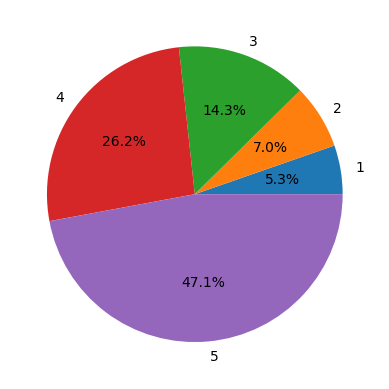

In [26]:
# Disegna grafico a torta 
rate_count.plot.pie(autopct="%.1f%%")

<Axes: >

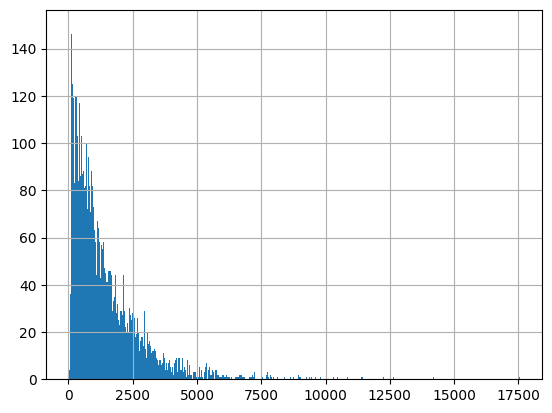

In [30]:
reviews["text"].str.len().hist(bins=1000)

Vediamo a colpo d'occhio che ci sono molte recensioni brevi e poche lunghe. Si aggirano tutte sull'intervallo 0-1000 caratteri.

## Suddivisione in recensioni positive e negative

- Aggiungere al frame colonna `label` che associ ad ogni recensione la stringa `pos` se il numero di stelle è maggiore di 3, altrimenti `neg`.
- Visualizzare il numero di valori `pos` e `neg` nella colonna `label`.

In [37]:
## aggiunta della colonna "pos"
reviews["label"] = np.where(reviews["stars"] > 3, "pos", "neg")
reviews

,text,stars,pos,label
0,George Romero did the right thing when he pick...,5,pos,pos
1,"OK, that makes it sound like something out of ...",5,pos,pos
2,"- At a tribal village, a pensive Elizabeth Cur...",5,pos,pos
3,Wow! This has to be one of the more unusual mo...,5,pos,pos
4,Kevin Costner is one of those actors that I ne...,5,pos,pos
...,...,...,...,...
9995,"You seen one heist film, you seen them all. Bu...",5,pos,pos
9996,"Often compared with ""The Big Chill"", and getti...",1,neg,neg
9997,This collection of Laurel and Hardy films cont...,3,neg,neg
9998,I love Vin Diesel but I wish I'd skipped this ...,3,neg,neg


In [40]:
reviews["label"].value_counts()

label
pos    7328
neg    2672
Name: count, dtype: int64

## Classificazione dei testi
Adesso che abbiamo caricato correttamente il dataset, andremo a costruire un modello che predica se una recensione è positiva o negativa. Per farlo, useremo un Vector Space Model in cui
- ogni riga rappresenta un testo da classificare
- ogni colonna rappresenta una variabile che caratterizza il testo (le parole)

Come prima cosa suddividiamo il set in validation e training con scikit-learn

In [42]:
from sklearn.model_selection import train_test_split
reviews_train, reviews_val = train_test_split(reviews, test_size=0.3, random_state=42)

Istanziamo ora lo spazio vettoriale con `CountVectorizer`

In [43]:
vect = CountVectorizer()

Adesso lo costruiamo sulla base dei documenti di training. Questo è il momento in cui vengono estratti i termini dal testo e viene costruita la matrice documenti-termini

In [48]:
dtm_train = vect.fit_transform(reviews_train["text"])
dtm_train

<7000x51772 sparse matrix of type '<class 'numpy.int64'>'
	with 993179 stored elements in Compressed Sparse Row format>

Notiamo che di $7000 \cdot 51772$ elementi solo $993179$ sono salvati (poiché $\neq 0$) e dunque solo il $0.27\%$ dei valori è salvato.

Costruiamo ora lo spazio vettoriale di validazione, poiché vogliamo che usi lo stesso dizionario di termini di quello di training dobbiamo usare il metodo `transform` e non `fit_transform`

In [49]:
dtm_val = vect.transform(reviews_val["text"])
dtm_val

<3000x51772 sparse matrix of type '<class 'numpy.int64'>'
	with 405523 stored elements in Compressed Sparse Row format>

Fatto questo avremo due matrici documenti-termini, una per il training e una per la validazione. In esse ogni riga costituisce un esempio (una recensione) e ogni colonna una feature (un termine).

Creiamo ora un modello di classificazione che consenta di classificare le recensioni in positive e negative. Usiamo un modello di regressione logistica, che è un modello lineare che restituisce in output un valore tra 0 e 1, che può essere interpretato come la probabilità che l'esempio appartenga alla classe positiva.

In [50]:
from sklearn.linear_model import LogisticRegression
lrm = LogisticRegression(solver="saga", C=10)
lrm.fit(dtm_train, reviews_train["label"])

C:\Users\pnmat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=10, solver='saga')

In [51]:
lrm.score(dtm_val, reviews_val["label"])

0.8

proviamo a testare il modello su nuove recensioni per vedere se funziona.

In [71]:
new_reviews = [
    "What an awesome movie!",
    "It was so bad, I hated it"
]

Vogliamo
- Estrarre la loro rappresentazione nello spazio vettroriale costruito sui documenti di training
- Ottenere le etichette previste dal modello per ciascuna
- Ottenere le distribuzioni di probabilità previste dal modello per ciascuna

In [72]:
new_reviews_dtm = vect.transform(new_reviews)
pd.DataFrame(
    new_reviews_dtm.toarray(),
    index=new_reviews,
    columns=vect.get_feature_names_out()
)

,00,000,000soldiers,002,007,00am,00p,00pm,01,02,...,zulu,zulus,zuni,zuniga,zwart,zwick,zylberstein,zylberstien,zz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
What an awesome movie!,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"It was so bad, I hated it",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
new_reviews_pred = lrm.predict(new_reviews_dtm)
pd.DataFrame(
    new_reviews_pred,
    index=new_reviews,
    columns=["label"]
)

,label
What an awesome movie!,pos
"It was so bad, I hated it",neg


In [74]:
new_reviews_prob = lrm.predict_proba(new_reviews_dtm)
pd.DataFrame(
    new_reviews_prob,
    index=new_reviews,
    columns=lrm.classes_
)

,neg,pos
What an awesome movie!,0.452504,0.547496
"It was so bad, I hated it",0.568155,0.431845


Questi dati ci mostrano che, sebbene il modello ci abbia preso, non era molto sicuro. Questo dovuto probabilmente al fatto che si è basato su poche parole.

## Analisi dei pesi
Di seguito vogliamo andare a valutare il peso dato ad ogni feature (parola) dal modello. Ovviamente le parole con peso negativo sono quelle che faranno abbassare la recensione mentre quelle positive la faranno salire.

In [81]:
coefs = pd.Series(
    lrm.coef_[0],
    index=vect.get_feature_names_out()
)
coefs

00                                  0.001171
000                                 0.005085
000soldiers                         0.000955
002                                -0.000263
007                                -0.012231
                                      ...   
zwick                               0.000944
zylberstein                        -0.001752
zylberstien                        -0.001752
zz                                 -0.001464
zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz   -0.001501
Length: 51772, dtype: float64

Con nsmallest possiamo visualizzare le parole con peso più basso, ovvero quelle che fanno abbassare la recensione maggiormente.

In [82]:
coefs.nsmallest(10)

bad       -0.280250
nothing   -0.204110
worst     -0.182329
plot      -0.181015
just      -0.155519
if        -0.151890
boring    -0.137827
decent    -0.134235
but       -0.134117
minutes   -0.133387
dtype: float64

Sembrano andare bene tranne alcune che vengono definite "stopwords" ovvero parole che non hanno un significato proprio ma che sono usate per costruire frasi. Ad esempio "just", "if", "but".

In [83]:
coefs.nlargest(10)

great        0.421000
best         0.213000
dvd          0.205961
excellent    0.204515
highly       0.180481
love         0.180272
well         0.180220
you          0.176888
very         0.167119
season       0.155834
dtype: float64

### Pipeline
Fino a questo momento l'inserimento di testo nello spazio vettoriale è stato fatto manualmente chiamando il metodo `count_vectorizer.transform` su ogni testo. Questo è un processo che può essere automatizzato con una _pipeline_.

In [91]:
from sklearn.pipeline import Pipeline
model = Pipeline([
    ("vect", CountVectorizer()),
    ("lrm", LogisticRegression(solver="saga", C=10))
])

model.fit(reviews_train["text"], reviews_train["label"])
model.score(reviews_val["text"], reviews_val["label"])


C:\Users\pnmat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.8

In [92]:
pd.Series(model.named_steps["lrm"].coef_[0], index=model.named_steps["vect"].get_feature_names_out()).nlargest(10)

great        0.420817
best         0.213200
dvd          0.205622
excellent    0.204271
highly       0.180826
love         0.180306
well         0.179725
you          0.176921
very         0.167464
season       0.155542
dtype: float64

# tf.idf
Fino a questo momento abbiamo assegnato il peso alle variabili solamente in base alla loro frequenza all'interno del documento.
Altra metrica di pesatura è il tf.idf che è il prodotto di due fattori.
1. Tf. Importanza locale di una parola in un documento. È il numero di occorrenze della parola nel documento.
2. Idf. Importanza globale di una parola in una collezione di documenti. È il logaritmo del rapporto fra il numero di documenti nella collezione e il numero di documenti in cui compare la parola. In altre parole è tanto più grande in quanti meno documenti compare: se un termine compare in tutti i documenti è probabile che sia poco specifico e quindi poco utile per distinguere i documenti. Potrebbe essere ad esempio una parola di uso comune (ad esempio "is" o "the").

Tramite questa metrica, pertanto, si bilancia il peso di una parola in base alla sua frequenza nel documento e nella collezione. 

Con scikit-learn possiamo usare il metodo `TfidfVectorizer` per costruire uno spazio vettoriale che usi il tf.idf come metrica di pesatura. Se prima usavamo `CountVectorizer` che dal nome ci fa capire che semplicemente contava le occorrenze delle parole, ora usiamo `TfidfVectorizer` che usa il tf.idf.
Essendo un filtro può essere inserito in una pipeline come sempre.

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
dtm = vect.fit_transform(docs)
pd.DataFrame(
    dtm.toarray(),
    index=docs,
    columns=vect.get_feature_names_out()
)

,and,beautiful,blue,cheese,is,love,sky,so,the
the sky is blue,0.000000,0.000000,0.399210,0.000000,0.488291,0.000000,0.488291,0.00000,0.603137
sky is blue and sky is beautiful,0.440516,0.347308,0.229880,0.000000,0.562351,0.000000,0.562351,0.00000,0.000000
the beautiful sky is so blue,0.000000,0.432026,0.285953,0.000000,0.349762,0.000000,0.349762,0.54797,0.432026
i love blue cheese,0.000000,0.000000,0.346182,0.663385,0.000000,0.663385,0.000000,0.00000,0.000000


Capiamo che i valori sono tf.idf poiché ad esempio "i love blue cheese" ha tutte e 4 le parole distinte, se con CountVectorizer avremmo avuto 1 in ogni cella, ora abbiamo valori diversi. In particolare "blue" ha peso più basso poiché compare in tutti i documenti, mentre "cheese" ha peso più alto poiché compare solo in esso. Cioè "cheese" viene ritenuta più importante poiché considerata esclusiva per quel documento. Questo è molto utile quando si devono classificare gli argomenti trattati in un testo.

In [98]:
model = Pipeline([
    ("vect", TfidfVectorizer()),
    ("lrm", LogisticRegression(solver="saga", C=10))
])
model.fit(reviews_train["text"], reviews_train["label"])
model.score(reviews_val["text"], reviews_val["label"])

0.8256666666666667

Abbiamo migliorato l'accuratezza di circa il 2% rispetto a prima. Questo è dovuto al fatto che il tf.idf è una metrica più accurata per pesare le parole.

## Scomposizione in termini
Abbiamo visto fin dall'inizio che il preprocessing, in particolare la fase di tokenizing, non è cosi semplice come potrebbe sembrare.
Sappiamo che la semplice suddivisione con spazi non coglie tutti i dettagli che vorremmo, abbiamo visto che con `word_tokenizer` di nltk si riesce a migliorare essendo addestrato su un dizionario molto vasto della lingua inglese. A questo punto potremmo chiederci che tokenizer usano `TfidfVectorizer` e `CountVectorizer` di scikit-learn.
In verità nessuno dei due, poiché usano un algoritmo ibrido implementato da scikit-learn.
E' tuttavia possibile specificare il tokenizer da usare.

Di seguito utilizziamo il metodo `str.split()` di Python per suddividere le frasi in parole. Questo metodo è molto più semplice di `word_tokenizer` e non è addestrato su un dizionario, tuttavia è molto più veloce.

In [99]:
str_split_model = Pipeline([
    ("vect", TfidfVectorizer(tokenizer=str.split)),
    ("lrm", LogisticRegression(solver="saga", C=10))
])
str_split_model.fit(reviews_train["text"], reviews_train["label"])
str_split_model.score(reviews_val["text"], reviews_val["label"])

C:\Users\pnmat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0.8093333333333333

Di seguito utilizzeremo invece `nltk.word_tokenizer()` di nltk, che è più lento ma più accurato.

In [100]:
nltk_tokenizer_model = Pipeline([
    ("vect", TfidfVectorizer(tokenizer=nltk.tokenize.word_tokenize)),
    ("lrm", LogisticRegression(solver="saga", C=10))
])
nltk_tokenizer_model.fit(reviews_train["text"], reviews_train["label"])
nltk_tokenizer_model.score(reviews_val["text"], reviews_val["label"])

C:\Users\pnmat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0.822

La cosa interessante è che possiamo utilizzare un come tokenizer anche metodi personalizzati che abbiano stessa interfaccia e cioè
- Input: stringa
- Output: lista di stringhe

In [104]:
empty_tokenizer_model = Pipeline([
    ("vect", TfidfVectorizer(tokenizer=lambda x: x.split(" "))),
    ("lrm", LogisticRegression(solver="saga", C=10))
])
empty_tokenizer_model.fit(reviews_train["text"], reviews_train["label"])
empty_tokenizer_model.score(reviews_val["text"], reviews_val["label"])

C:\Users\pnmat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0.8096666666666666

## Riduzione della dimensionalità
Si capisce bene che se il tokenizer crea una feature per ogni parola distinta presente nei documenti di training, la dimensionalità dello spazio vettoriale può diventare molto elevata. Questo può portare a 
- problemi di overfitting 
- tempi di addestramento molto lunghi. 

Può essere utile provare a **ridurre il numero di parole usate** per rappresentare i documenti.
In particolare può capitare che esistano parole che compaino solo 1 o 2 volte in tutto l'insieme di documenti fornito. 

- Se da un lato abbiamo visto che l'idf valorizza quelle parole che compaiono in meno documenti perché caratterizzanti dei documenti in cui compare 
- se una feature è presente solo in 2 documenti su un milione potrebbe anche non essere rilevante (anche perché potrebbe essere un typos di una parola) e dunque potremmo eliminarla.

Per risolvere esiste un iperparametro del vectorizer chiamato `min_df` che indica il numero minimo di documenti in cui deve comparire una parola per essere considerata. 
Accetta in input 
- numeri **interi**, in tal caso indica il numero minimo di documenti in cui deve comparire una parola per essere considerata
- numero **decimale** in $[0,1]$ che rappresenta la percentuale di documenti in cui deve comparire una parola per essere considerata.

In [105]:
model = Pipeline([
    ("vect", TfidfVectorizer(tokenizer=nltk.tokenize.word_tokenize, min_df=3)),
    ("lrm", LogisticRegression(solver="saga", C=10))
])
model.fit(reviews_train["text"], reviews_train["label"])
model.score(reviews_val["text"], reviews_val["label"])

C:\Users\pnmat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0.8226666666666667

Notiamo che l'accuratezza è praticamente la stessa pur avendo parametri in meno. Se prima ne avevamo 50k+ feature (parole), in questo caso solo 20k.

In [107]:
len(model.named_steps["vect"].get_feature_names_out())

21884

## Rimozione di stopwords
Esattamente come le parole che compaiono in pochi documenti, anche le stopwords sono parole che non sono rilevanti per la classificazione. Esse sono parole che non hanno un significato proprio ma che sono usate per costruire frasi. Ad esempio "just", "if", "but".
Esistono tantissime liste di stopwords per ogni lingua, ad esempio in nltk possiamo importare quella inglese con `nltk.corpus.stopwords.words('english')`.

In [109]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pnmat\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [110]:
stoplist = nltk.corpus.stopwords.words("english")
stoplist[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [112]:
len(stoplist)

179

Per integrarle nel modello sarà sufficiente passarle come parametro al vectorizer (tfidf o count indifferentemente).

In [113]:
model = Pipeline([
    ("vect", TfidfVectorizer(tokenizer=nltk.tokenize.word_tokenize, stop_words=stoplist, min_df=3)),
    ("lrm", LogisticRegression(solver="saga", C=10))
])
model.fit(reviews_train["text"], reviews_train["label"])
model.score(reviews_val["text"], reviews_val["label"])

C:\Users\pnmat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\pnmat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


0.81

Questo risultato è ottenuto avendo ridotto ulteriormente il numero di feature (parole).

In [114]:
len(model.named_steps["vect"].get_feature_names_out())

21743

## Grid Search per riduzione dimensionalità
In realtà l'accuratezza è leggermente calata perché potrebbe capitare che quelle parole considerate stopwords, potevano essere utili per il modello. Ecco perché è sempre opportuno testare i modelli con e senza iperparametri per capire quale sia il migliore.

In [115]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV 

In [122]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

model = Pipeline([
    ("vect", TfidfVectorizer()),
    ("lrm", LogisticRegression(solver="saga", C=10))
])

grid = {
    "vect__tokenizer": [None, nltk.tokenize.word_tokenize, str.split],
    "vect__min_df": [3, 5, 10],
    "vect__stop_words": [None, stoplist],
}

gs = GridSearchCV(model, grid, cv=skf, scoring="accuracy", n_jobs=-1)
gs.fit(reviews_train["text"], reviews_train["label"])

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('vect', TfidfVectorizer()),
                                       ('lrm',
                                        LogisticRegression(C=10,
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'vect__min_df': [3, 5, 10],
                         'vect__stop_words': [None,
                                              ['i', 'me', 'my', 'myself', 'we',
                                               'our', 'ours', 'ourselves',
                                               'you', "you're", "you've",
                                               "you'll", "you'd", 'your',
                                               'yours', 'yourself',
                                               'yourselves', 'he', 'him', 'his',
                                               'himself', 'she', "she's", 'her',
                                               'hers', 'herself', 'it', "it's",
                                               'its', 'itself', ...]],
                         'vect__tokenizer': [None,
                                             <function word_tokenize at 0x0000016D7FEC0E00>,
                                             <method 'split' of 'str' objects>]},
             scoring='accuracy')

In [123]:
gs.score(reviews_val["text"], reviews_val["label"])

0.8226666666666667

In [124]:
pd.DataFrame(gs.cv_results_).sort_values("mean_test_score", ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_vect__min_df,param_vect__stop_words,param_vect__tokenizer,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.485166,0.089299,0.738499,0.022057,3,None,None,"{'vect__min_df': 3, 'vect__stop_words': None, ...",0.806341,0.812688,0.817402,0.812144,0.004532,1
12,2.081501,0.356411,0.686832,0.151728,10,None,None,"{'vect__min_df': 10, 'vect__stop_words': None,...",0.812339,0.808401,0.815688,0.812143,0.002978,2
6,2.021833,0.100549,0.638834,0.035122,5,None,None,"{'vect__min_df': 5, 'vect__stop_words': None, ...",0.806769,0.811830,0.814831,0.811143,0.003327,3
13,9.131001,0.046784,4.100166,0.125308,10,None,<function word_tokenize at 0x0000016D7FEC0E00>,"{'vect__min_df': 10, 'vect__stop_words': None,...",0.803770,0.805829,0.811402,0.807000,0.003224,4
1,10.849500,0.086301,4.787166,0.064188,3,None,<function word_tokenize at 0x0000016D7FEC0E00>,"{'vect__min_df': 3, 'vect__stop_words': None, ...",0.806769,0.807115,0.807115,0.807000,0.000163,5
2,1.854501,0.097735,0.456999,0.105799,3,None,<method 'split' of 'str' objects>,"{'vect__min_df': 3, 'vect__stop_words': None, ...",0.808912,0.807973,0.803686,0.806857,0.002275,6
16,9.101001,0.130608,4.316501,0.131903,10,"[i, me, my, myself, we, our, ours, ourselves, ...",<function word_tokenize at 0x0000016D7FEC0E00>,"{'vect__min_df': 10, 'vect__stop_words': ['i',...",0.810626,0.800257,0.808401,0.806428,0.004457,7
3,1.881000,0.096198,0.561667,0.019858,3,"[i, me, my, myself, we, our, ours, ourselves, ...",None,"{'vect__min_df': 3, 'vect__stop_words': ['i', ...",0.804199,0.807544,0.807115,0.806286,0.001486,8
7,10.175834,0.198946,4.718500,0.070202,5,None,<function word_tokenize at 0x0000016D7FEC0E00>,"{'vect__min_df': 5, 'vect__stop_words': None, ...",0.805056,0.808401,0.805401,0.806286,0.001502,9
15,1.488834,0.025590,0.570833,0.104996,10,"[i, me, my, myself, we, our, ours, ourselves, ...",None,"{'vect__min_df': 10, 'vect__stop_words': ['i',...",0.802485,0.804972,0.809687,0.805715,0.002987,10


## n-gram
Un ulteriore strumento per ridurre la dimensionalità è quello di considerare non solo le singole parole ma anche tuple di parole. Questo è chiamato n-gram. Gli n-gram sono generalizzazioni di 2-gram, 3-gram, ecc. e sono fondamentalmente **sequenze di $n$ parole consecutive**. Nei casi più comuni sono al massimo composte da 2 o 3 parole. Ad esempio, per la frase "I go to New York" con $n = 2$ avremo
- "I go"
- "go to"
- "to New"
- "New York"

di queste, chiaramente, solo "New York" è una n-gram valida, in quanto le altre non hanno significato proprio.
La loro importanza sta nel fatto che potrei pensare di usarle come feature esattamente come uso le singole parole. Il fatto che li vada a generare tutti non è molto utile poiché solamente poche di esse hanno senso compiuto (nel mio esempio solo una su quattro).